In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import minmax_scale

In [46]:
df = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [47]:
df.shape

(301, 8)

In [48]:
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

### Data Cleansing 

In [49]:
# Create a temporary dataframe.
temp_df = df

In [50]:
# Get the number of missing data points per column.
missing_values_count = temp_df.isnull().sum()

# Look at the number of missing points.
missing_values_count[:]

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [51]:
# Remove Previous S.NO, Nationality, and Year Rank column.
temp_df = temp_df.drop(['S.NO','Nationality','Previous Year Rank'],axis=1)
temp_df.columns

Index(['Name', 'Current Rank', 'Sport', 'Year', 'earnings ($ million)'], dtype='object')

In [52]:
# Create a new column 'cleaned_name' with special characters removed. 
temp_df['cleaned_name'] = temp_df['Name'].str.replace('"', '')

# Convert to lower case.
temp_df['Sport'] = temp_df['Sport'].str.lower()

### Data Analysis

In [53]:
# Check the data type of the columns in the temporary dataframe.
column_dtypes = temp_df.dtypes
column_dtypes

Name                     object
Current Rank              int64
Sport                    object
Year                      int64
earnings ($ million)    float64
cleaned_name             object
dtype: object

In [54]:
temp_df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [55]:
# Replace "auto racing (nascar)" with "nascar" in the 'Sport' column.
temp_df['Sport'] = temp_df['Sport'].replace('auto racing (nascar)', 'nascar')

# Replace "auto racing" with "f1 motorsports" in the 'Sport' column.
temp_df['Sport'] = temp_df['Sport'].replace('auto racing', 'f1 motorsports')

# Replace "f1 racing" with "f1 motorsports" in the 'Sport' column.
temp_df['Sport'] = temp_df['Sport'].replace('f1 racing', 'f1 motorsports')

# Group by sport and year.
grouped_df = df.groupby(['Sport', 'Year'])

# Calculate the total earnings for each sport in each year.
total_earnings_by_sport_year = grouped_df['earnings ($ million)'].sum()
total_earnings_by_sport_year

Sport              Year
American Football  2004    42.0
                   2005    37.5
                   2006    29.0
                   2010    78.2
                   2012    42.4
                           ... 
tennis             1995    16.0
                   2004    28.2
                   2008    35.0
                   2010    43.0
                   2011    47.0
Name: earnings ($ million), Length: 177, dtype: float64

In [56]:
# Group by year and find the index of the highest-earning sport within each year.
highest_earning_sport_idx = temp_df.groupby('Year')['earnings ($ million)'].idxmax()

# Use the obtained indices to get the rows corresponding to the highest-earning sports for each year.
highest_earning_sports_by_year = temp_df.loc[highest_earning_sport_idx].iloc[::-1]
highest_earning_sports_by_year


,Name,Current Rank,Sport,Year,earnings ($ million),cleaned_name
291,Roger Federer,1,tennis,2020,106.3,Roger Federer
281,Lionel Messi,1,soccer,2019,127.0,Lionel Messi
271,Floyd Mayweather,1,boxing,2018,285.0,Floyd Mayweather
261,Cristiano Ronaldo,1,soccer,2017,93.0,Cristiano Ronaldo
251,Cristiano Ronaldo,1,soccer,2016,88.0,Cristiano Ronaldo
241,Floyd Mayweather,1,boxing,2015,300.0,Floyd Mayweather
231,Floyd Mayweather,1,boxing,2014,105.0,Floyd Mayweather
221,Tiger Woods,1,golf,2013,78.1,Tiger Woods
211,Floyd Mayweather,1,boxing,2012,85.0,Floyd Mayweather
201,Tiger Woods,1,golf,2011,75.0,Tiger Woods


In [110]:
# Calculate the number of occurrences of the different sports from highest_earning_sports_by_year.
sport_occurrences = highest_earning_sports_by_year['Sport'].value_counts()
sport_occurrences

Sport
golf              11
boxing             7
basketball         6
soccer             3
f1 motorsports     2
tennis             1
Name: count, dtype: int64

In [57]:
# Find the index of the highest-earning athlete within each sport.
highest_earning_athlete_idx = temp_df.groupby('Sport')['earnings ($ million)'].idxmax()

# Now use the obtained indices to get the rows corresponding to the highest-earning athletes within each sport.
highest_earning_athletes = temp_df.loc[highest_earning_athlete_idx]
highest_earning_athletes

,Name,Current Rank,Sport,Year,earnings ($ million),cleaned_name
286,Russell Wilson,6,american football,2019,89.5,Russell Wilson
52,Deion Sanders,3,american football / baseball,1995,22.5,Deion Sanders
208,Alex Rodriguez,8,baseball,2011,35.0,Alex Rodriguez
288,LeBron James,8,basketball,2019,89.0,LeBron James
241,Floyd Mayweather,1,boxing,2015,300.0,Floyd Mayweather
149,Lance Armstrong,9,cycling,2005,28.0,Lance Armstrong
132,Michael Schumacher,2,f1 motorsports,2004,80.0,Michael Schumacher
171,Tiger Woods,1,golf,2008,115.0,Tiger Woods
78,Joe Sakic,9,hockey,1997,17.9,Joe Sakic
82,Sergei Federov,3,ice hockey,1998,29.8,Sergei Federov


In [58]:
# Find the index of the highest-earning athlete from the earning column.
highest_earning_athlete_idx = temp_df['earnings ($ million)'].idxmax()

# Use the obtained index to get the row corresponding to the highest-earning athlete.
highest_earning_athlete = temp_df.loc[highest_earning_athlete_idx]
highest_earning_athlete

Name                    Floyd Mayweather
Current Rank                           1
Sport                             boxing
Year                                2015
earnings ($ million)               300.0
cleaned_name            Floyd Mayweather
Name: 241, dtype: object

In [59]:
# Find the index of the lowest-earning athlete from the earning column.
lowest_earning_athlete_idx = temp_df['earnings ($ million)'].idxmin()

# Use the obtained index to get the row corresponding to the lowest-earning athlete.
lowest_earning_athlete = temp_df.loc[lowest_earning_athlete_idx]
lowest_earning_athlete

Name                    Michael Jordan
Current Rank                         8
Sport                       basketball
Year                              1990
earnings ($ million)               8.1
cleaned_name            Michael Jordan
Name: 7, dtype: object

In [60]:
# Find the index of the highest-earning athlete within each year.
year_highest_earning_athlete_idx = temp_df.groupby('Year')['earnings ($ million)'].idxmax()

# Use the obtained index to get the row corresponding to the highest-earning athlete.
year_highest_earning_athlete = temp_df.loc[year_highest_earning_athlete_idx].iloc[::-1]
year_highest_earning_athlete

,Name,Current Rank,Sport,Year,earnings ($ million),cleaned_name
291,Roger Federer,1,tennis,2020,106.3,Roger Federer
281,Lionel Messi,1,soccer,2019,127.0,Lionel Messi
271,Floyd Mayweather,1,boxing,2018,285.0,Floyd Mayweather
261,Cristiano Ronaldo,1,soccer,2017,93.0,Cristiano Ronaldo
251,Cristiano Ronaldo,1,soccer,2016,88.0,Cristiano Ronaldo
241,Floyd Mayweather,1,boxing,2015,300.0,Floyd Mayweather
231,Floyd Mayweather,1,boxing,2014,105.0,Floyd Mayweather
221,Tiger Woods,1,golf,2013,78.1,Tiger Woods
211,Floyd Mayweather,1,boxing,2012,85.0,Floyd Mayweather
201,Tiger Woods,1,golf,2011,75.0,Tiger Woods


In [61]:
# Calculate the average earnings for each sport in each year. 
average_earning_sports = temp_df.groupby('Sport')['earnings ($ million)'].mean()
average_earning_sports

Sport
american football               53.011765
american football / baseball    22.500000
baseball                        24.350000
basketball                      42.198765
boxing                          49.973913
cycling                         28.000000
f1 motorsports                  33.267742
golf                            48.556818
hockey                          17.900000
ice hockey                      19.266667
mma                             99.000000
motorcycle gp                   32.000000
nascar                          24.340000
nba                             15.200000
nfl                             12.500000
soccer                          67.378788
tennis                          44.230435
Name: earnings ($ million), dtype: float64

### Data Visualisation

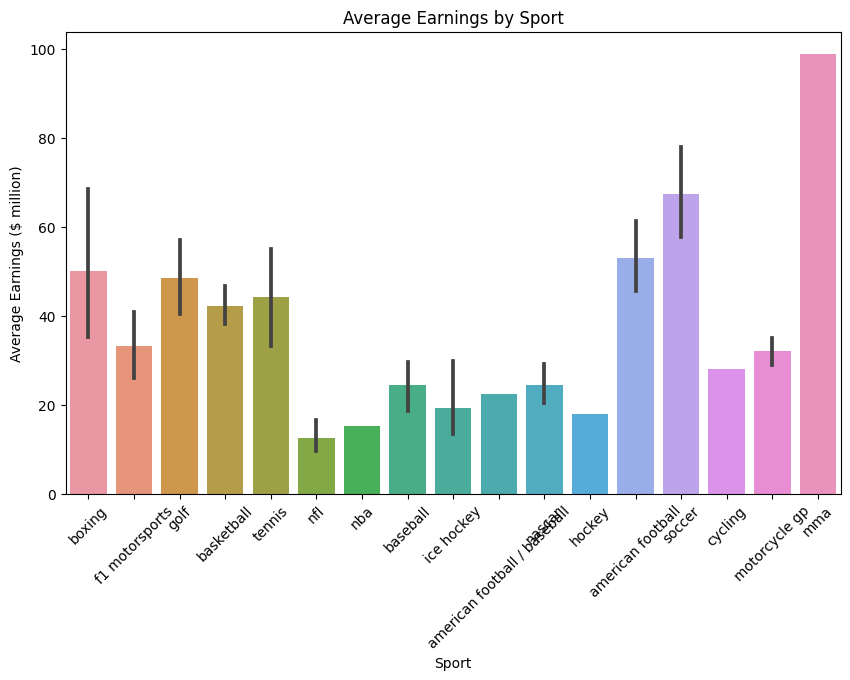

In [62]:
# Analyse the distribution of average earnings within each sport using bar-plot.

# Group by 'Sport' and calculate the average earnings for each sport.
average_earnings_by_sport_year = temp_df.groupby(['Sport', 'Year'])['earnings ($ million)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sport', y='earnings ($ million)', data=temp_df)
plt.xticks(rotation=45)
plt.xlabel('Sport')
plt.ylabel('Average Earnings ($ million)')
plt.title('Average Earnings by Sport')
plt.show()

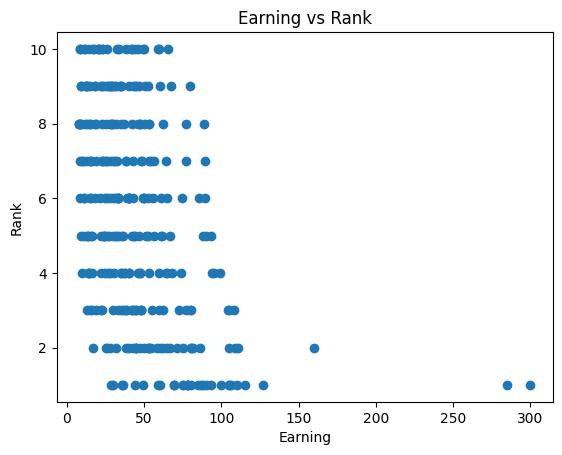

In [70]:
# Correlation between athletes' earnings and their current rank.

# Create the scatter plot
plt.scatter(temp_df['earnings ($ million)'], temp_df['Current Rank'])

# Set plot title and labels.
plt.title('Earning vs Rank')
plt.xlabel('Earning')
plt.ylabel('Rank')

# Show the plot.
plt.show()

In [71]:
correlation_matrix = temp_df[['earnings ($ million)', 'Current Rank']].corr()
correlation_matrix

,earnings ($ million),Current Rank
earnings ($ million),1.000000,-0.449052
Current Rank,-0.449052,1.000000


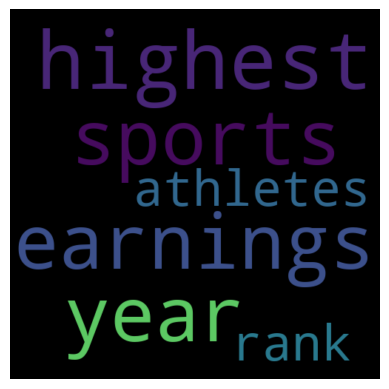

In [115]:
text = ('highest-earnings sports year athletes rank')

# Generate a word cloud image using the text.
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(text)

#Display the generated image using matplotlib.
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


